In [2]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, optimize

y=-0.021820530094274815x+0.17262381445321323
[ 0.00248909 -0.03381545  0.18641749]


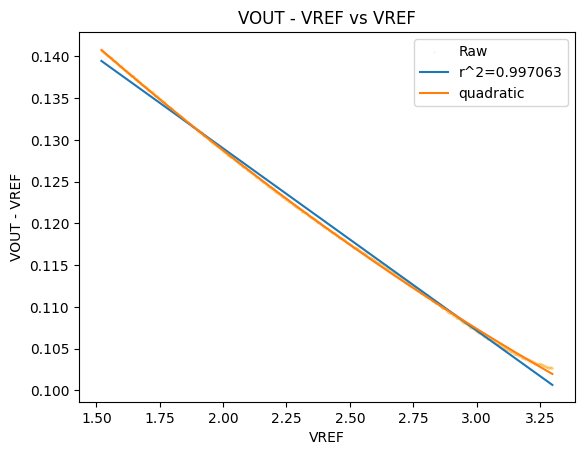

In [7]:
log = pathlib.Path("COM9_2024_06_03.12.19.33.727.txt")

with log.open('r') as f:
    out = np.asarray(f.read().splitlines()[3:], dtype=float)
    v = np.arange(1.520, 3.300, 0.001)
    delta = out - v / 2

    res = stats.linregress(v, delta)

    def quadratic(x, a, b, c):
        return a * x**2 + b * x + c
    params, pcov = optimize.curve_fit(quadratic, v, delta)
    print("y={}x+{}".format(res.slope, res.intercept))
    print(params)

    plt.scatter(v, delta, 0.01, color="orange", label = "Raw")
    plt.plot(v, res.intercept + v* res.slope, label = "r^2={:4f}".format(res.rvalue**2))
    plt.plot(v, quadratic(v, *params), label='quadratic')
    plt.title('VOUT - VREF vs VREF')
    plt.xlabel("VREF")
    plt.ylabel("VOUT - VREF")
    plt.legend()
    plt.show()
    

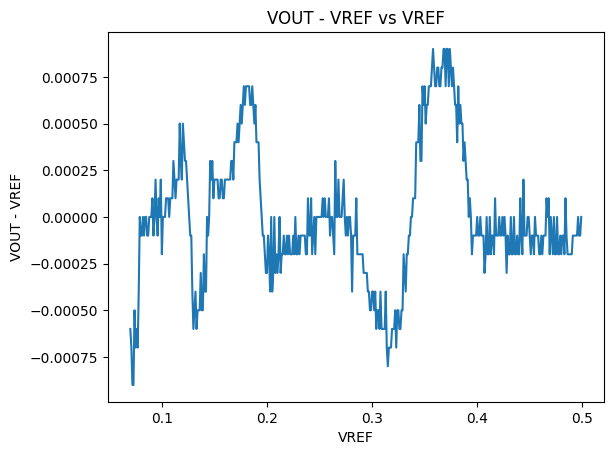

In [3]:
log = pathlib.Path("COM9_2024_06_03.12.40.46.824.txt")

with log.open('r') as f:
    out = np.asarray(f.read().splitlines()[3:], dtype=float)
    v = np.arange(0.07, 0.5, 0.001)

    plt.plot(v, out)
    plt.title('VOUT - VREF vs VREF')
    plt.xlabel("VREF")
    plt.ylabel("VOUT - VREF")
    plt.show()
    